In [1]:
from diffusers import StableDiffusionPipeline
import torch

model_id = 'prompthero/openjourney'
pipe = StableDiffusionPipeline.from_pretrained(
  model_id,
  torch_dtype=torch.float16,
  requires_safety_checker=False,
)
pipe = pipe.to('cuda')
pipe.enable_xformers_memory_efficient_attention()
pipe.safety_checker = None

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/66 [00:00<?, ?it/s]

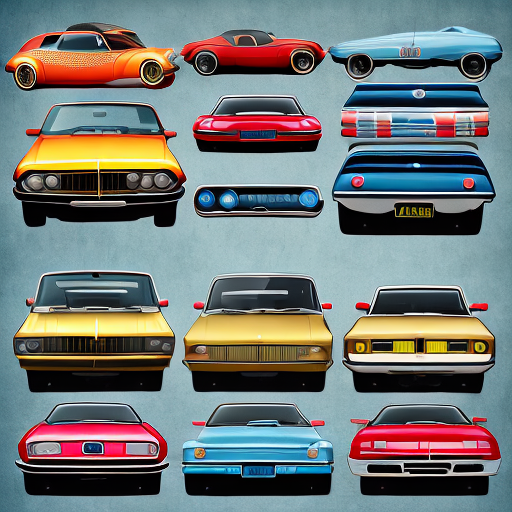

In [2]:
prompt = "retro serie of different cars with different colors and shapes, mdjrny-v4 style"
args = dict(
  width=512,
  height=512,
  num_inference_steps=66,
)
pipe(prompt, **args).images[0]

  0%|          | 0/66 [00:00<?, ?it/s]

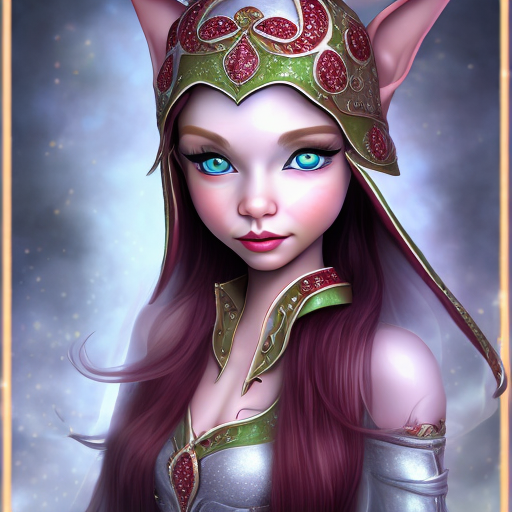

In [3]:
prompt = 'elf girl, pretty'
pipe(prompt, **args).images[0]

  0%|          | 0/66 [00:00<?, ?it/s]

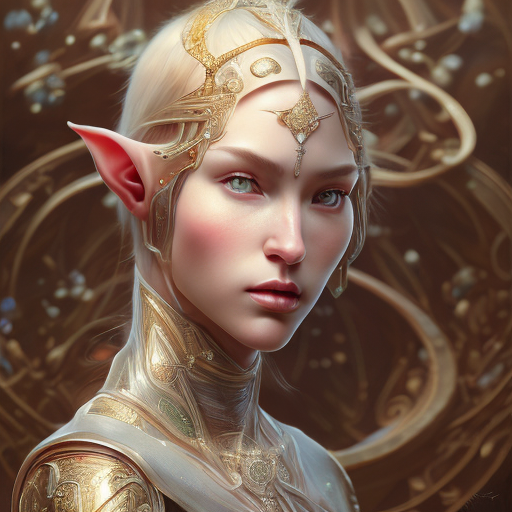

In [4]:
prompt = 'mdjrny-v4 style portrait of female elf, intricate, elegant, highly detailed, digital painting, artstation, concept art, smooth, sharp focus, illustration, art by artgerm and greg rutkowski and alphonse mucha, 8k'
pipe(prompt, **args).images[0]

  0%|          | 0/66 [00:00<?, ?it/s]

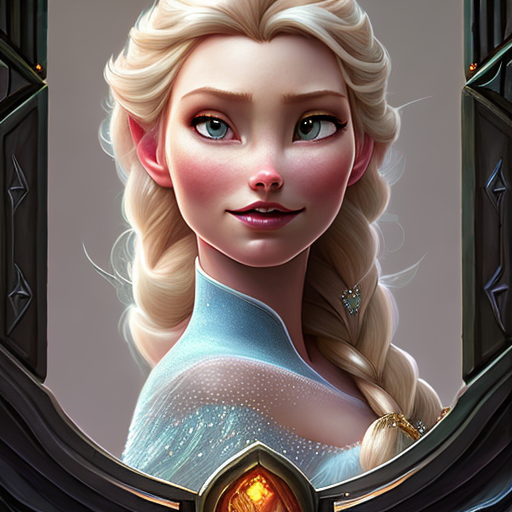

In [5]:
prompt = 'Elsa, d & d, fantasy, intricate, elegant, highly detailed, digital painting, artstation, concept art, matte, sharp focus, illustration, hearthstone, art by artgerm and greg rutkowski and alphonse mucha, hdr 4k, 8k'
pipe(prompt, **args).images[0]

  0%|          | 0/66 [00:00<?, ?it/s]

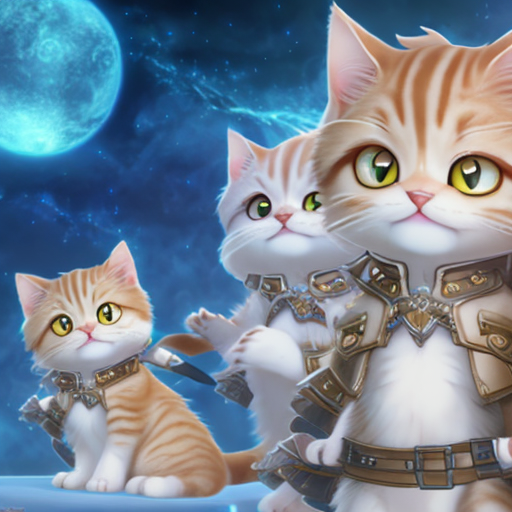

In [6]:
prompt = 'cute tabby cat ultra-detailer, HD, design by Hideo Minaba, Yuya Nagai, Ryoji Ohara, Ryota Murayama and Hitomi Yoshimura, white background, granblue fantasy, anime'
pipe(prompt, **args).images[0]

  0%|          | 0/90 [00:00<?, ?it/s]

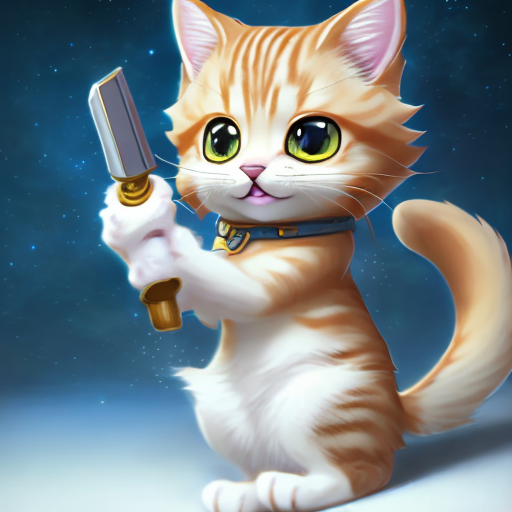

In [7]:
args = dict(
  width=512,
  height=512,
  num_inference_steps=90,
)
pipe(prompt, **args).images[0]

  0%|          | 0/90 [00:00<?, ?it/s]

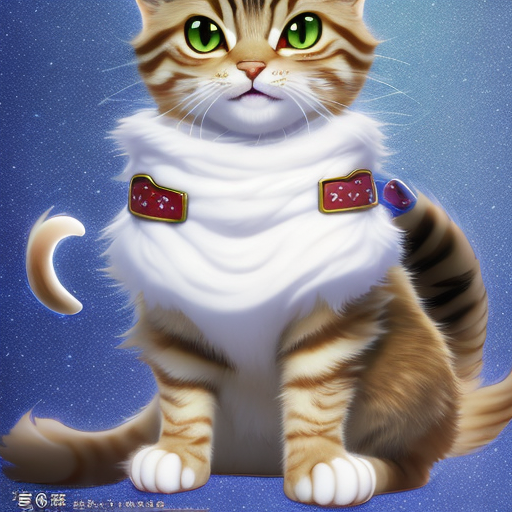

In [8]:
args = dict(
  width=512,
  height=512,
  num_inference_steps=90,
)
pipe(prompt, **args).images[0]

  0%|          | 0/60 [00:00<?, ?it/s]

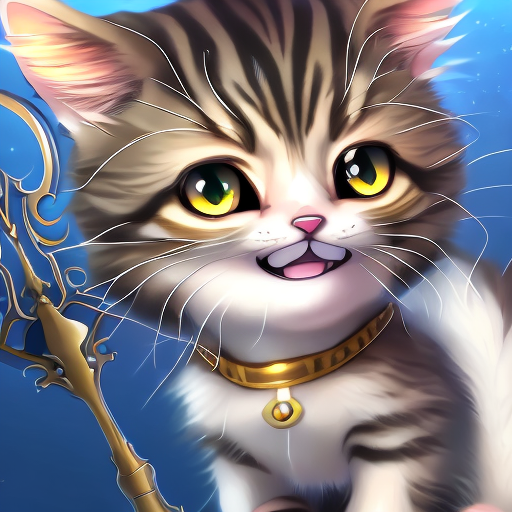

In [9]:
args = dict(
  width=512,
  height=512,
  num_inference_steps=60,
)
pipe(prompt, **args).images[0]

  0%|          | 0/60 [00:00<?, ?it/s]

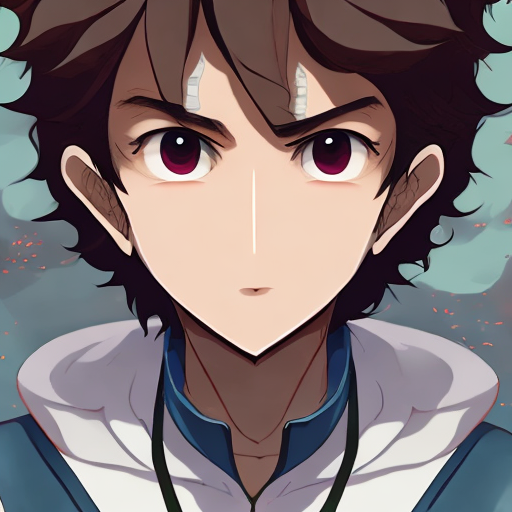

In [10]:
prompt = 'ultra-detailer, HD, anime, cute boy, confused'
pipe(prompt, **args).images[0]

In [11]:
print(pipe)

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.18.1",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "requires_safety_checker": false,
  "safety_checker": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}



In [12]:
print(pipe.scheduler)

PNDMScheduler {
  "_class_name": "PNDMScheduler",
  "_diffusers_version": "0.18.1",
  "beta_end": 0.012,
  "beta_schedule": "scaled_linear",
  "beta_start": 0.00085,
  "clip_sample": false,
  "num_train_timesteps": 1000,
  "prediction_type": "epsilon",
  "set_alpha_to_one": false,
  "skip_prk_steps": true,
  "steps_offset": 1,
  "timestep_spacing": "leading",
  "trained_betas": null
}



In [13]:
print(pipe.vae)

AutoencoderKL(
  (encoder): Encoder(
    (conv_in): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (down_blocks): ModuleList(
      (0): DownEncoderBlock2D(
        (resnets): ModuleList(
          (0-1): 2 x ResnetBlock2D(
            (norm1): GroupNorm(32, 128, eps=1e-06, affine=True)
            (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (norm2): GroupNorm(32, 128, eps=1e-06, affine=True)
            (dropout): Dropout(p=0.0, inplace=False)
            (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (nonlinearity): SiLU()
          )
        )
        (downsamplers): ModuleList(
          (0): Downsample2D(
            (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2))
          )
        )
      )
      (1): DownEncoderBlock2D(
        (resnets): ModuleList(
          (0): ResnetBlock2D(
            (norm1): GroupNorm(32, 128, eps=1e-06, affine=True)
            (c

In [14]:
print(pipe.unet)

UNet2DConditionModel(
  (conv_in): Conv2d(4, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=320, out_features=1280, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=1280, out_features=1280, bias=True)
  )
  (down_blocks): ModuleList(
    (0): CrossAttnDownBlock2D(
      (attentions): ModuleList(
        (0-1): 2 x Transformer2DModel(
          (norm): GroupNorm(32, 320, eps=1e-06, affine=True)
          (proj_in): Conv2d(320, 320, kernel_size=(1, 1), stride=(1, 1))
          (transformer_blocks): ModuleList(
            (0): BasicTransformerBlock(
              (norm1): LayerNorm((320,), eps=1e-05, elementwise_affine=True)
              (attn1): Attention(
                (to_q): Linear(in_features=320, out_features=320, bias=False)
                (to_k): Linear(in_features=320, out_features=320, bias=False)
                (to_v): Linear(in_features=320, out_fe